In [1]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
import seaborn as sns
import numpy as np
import folium
from folium import plugins

# matplotlib 폰트설정
plt.rc('font', family='NanumGothic')

pd.set_option("display.max_rows", 100)
warnings.filterwarnings(action='ignore')

# 전체적인 양상

## 데이터 불러오기

In [2]:
patient = pd.read_csv("D:/LikeLion/Data/Week4/Project/PatientInfo.csv")
route = pd.read_csv("D:/LikeLion/Data/Week4/Project/PatientRoute.csv")
case = pd.read_csv("D:/LikeLion/Data/Week4/Project/Case.csv")
time = pd.read_csv("D:/LikeLion/Data/Week4/Project/Time.csv")
city = pd.read_csv("D:/LikeLion/Data/Week4/Project/TimeProvince.csv")
weather = pd.read_csv("D:/LikeLion/Data/Week4/Project/Weather.csv")
search = pd.read_csv("D:/LikeLion/Data/Week4/Project/SearchTrend.csv")
gender = pd.read_csv("D:/LikeLion/Data/Week4/Project/TimeGender.csv")
policy = pd.read_csv("D:/LikeLion/Data/Week4/Project/Policy.csv")
search = search.loc[:, ['date', 'coronavirus']]

In [3]:
time_confirmed = city.groupby(by='date').sum().reset_index()
data = [0]
for i in range(1,len(time_confirmed)):
    tmp = time_confirmed.loc[i]['confirmed'] - time_confirmed.loc[i-1]['confirmed']
    data.append(tmp)
data2 = [0]
for i in range(1,len(time_confirmed)):
    tmp = time_confirmed.loc[i]['deceased'] - time_confirmed.loc[i-1]['deceased']
    data2.append(tmp)
    
time_confirmed['date_confirmed'] = data
time_confirmed['date_deceased'] = data2

In [4]:
patient = patient.sort_values(by="confirmed_date").reset_index()
patient.head()

,index,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,860,1400000001,1.0,female,1985.0,30s,China,Incheon,etc,NaN,overseas inflow,NaN,NaN,NaN,2020-01-19,2020-01-20,2020-02-06,NaN,released
1,0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
2,1081,2000000001,3.0,male,1966.0,50s,Korea,Gyeonggi-do,Goyang-si,NaN,overseas inflow,1.0,NaN,16.0,NaN,2020-01-26,2020-02-12,NaN,released
3,1082,2000000002,4.0,male,1964.0,50s,Korea,Gyeonggi-do,Pyeongtaek-si,NaN,overseas inflow,1.0,NaN,95.0,NaN,2020-01-27,2020-02-09,NaN,released
4,1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released


## 코로나의 시작

## 01.03 ~ 01.19 Blue Level : 관심단계에서 주의 단계로

## 01.20 ~ 01.27 yellow Level : 국내 첫 코로나 확진자 발생

In [5]:
yellow = patient.sort_values(by="confirmed_date").head(4)
yellow

,index,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,860,1400000001,1.0,female,1985.0,30s,China,Incheon,etc,NaN,overseas inflow,NaN,NaN,NaN,2020-01-19,2020-01-20,2020-02-06,NaN,released
1,0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
2,1081,2000000001,3.0,male,1966.0,50s,Korea,Gyeonggi-do,Goyang-si,NaN,overseas inflow,1.0,NaN,16.0,NaN,2020-01-26,2020-02-12,NaN,released
3,1082,2000000002,4.0,male,1964.0,50s,Korea,Gyeonggi-do,Pyeongtaek-si,NaN,overseas inflow,1.0,NaN,95.0,NaN,2020-01-27,2020-02-09,NaN,released


## 코로나 전파의 시작

In [6]:
# 1.28 ~ 2.22 Orange Level : 전파의 시작

In [7]:
patient = patient.reset_index()

In [8]:
patient.head()

,level_0,index,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,0,860,1400000001,1.0,female,1985.0,30s,China,Incheon,etc,NaN,overseas inflow,NaN,NaN,NaN,2020-01-19,2020-01-20,2020-02-06,NaN,released
1,1,0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
2,2,1081,2000000001,3.0,male,1966.0,50s,Korea,Gyeonggi-do,Goyang-si,NaN,overseas inflow,1.0,NaN,16.0,NaN,2020-01-26,2020-02-12,NaN,released
3,3,1082,2000000002,4.0,male,1964.0,50s,Korea,Gyeonggi-do,Pyeongtaek-si,NaN,overseas inflow,1.0,NaN,95.0,NaN,2020-01-27,2020-02-09,NaN,released
4,4,1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released


In [9]:
date = patient.loc[patient['confirmed_date']=='2020-02-23']
date.head()

,level_0,index,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
218,218,3088,6019000018,NaN,female,1963.0,50s,Korea,Gyeongsangbuk-do,Uiseong-gun,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-23,NaN,NaN,isolated
219,219,3087,6019000017,NaN,female,1955.0,60s,Korea,Gyeongsangbuk-do,Uiseong-gun,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-23,NaN,NaN,isolated
220,220,3089,6019000019,NaN,female,1951.0,60s,Korea,Gyeongsangbuk-do,Uiseong-gun,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-23,NaN,NaN,isolated
221,221,3157,6022000001,NaN,male,1964.0,50s,Korea,Gyeongsangbuk-do,Chilgok-gun,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-23,2020-03-06,NaN,released
222,222,3213,6023000007,604.0,female,NaN,20s,Korea,Gyeongsangbuk-do,Pohang-si,NaN,contact with patient,NaN,6.023000e+09,NaN,NaN,2020-02-23,2020-04-02,NaN,released


In [10]:
orange = patient[4:218]
orange.head()

,level_0,index,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
4,4,1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
5,5,2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
6,6,3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
7,7,1997,5000000001,8.0,female,1958.0,60s,Korea,Jeollabuk-do,Gunsan-si,NaN,overseas inflow,1.0,NaN,113.0,NaN,2020-01-31,2020-02-12,NaN,released
8,8,5,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,43.0,NaN,2020-01-31,2020-02-19,NaN,released


In [11]:
# Orange Level에서의 해외 유입 확진자의 비율

In [12]:
kr = orange.loc[orange['infection_case']!='overseas inflow']
overseas = orange.loc[orange['infection_case']=='overseas inflow']
overseas.head()

,level_0,index,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
4,4,1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
6,6,3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
7,7,1997,5000000001,8.0,female,1958.0,60s,Korea,Jeollabuk-do,Gunsan-si,NaN,overseas inflow,1.0,NaN,113.0,NaN,2020-01-31,2020-02-12,NaN,released
12,12,7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released
15,15,830,1300000001,16.0,female,NaN,40s,Korea,Gwangju,NaN,NaN,overseas inflow,NaN,NaN,450.0,2020-01-27,2020-02-03,2020-02-20,NaN,released


In [13]:
kr_n = len(kr)
overseas_n = len(overseas)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


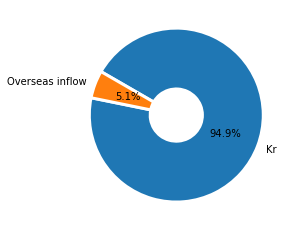

In [14]:
name = ['Kr', 'Overseas inflow']
data = [kr_n,overseas_n]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(data, labels=name, autopct='%.1f%%', startangle=150, counterclock=False, wedgeprops=wedgeprops)
plt.show()

# 특별 입국 절차
### 02.04, 02.12일에 중국, 홍콩, 마카오로부터 특별 입국 절차

In [15]:
policy = policy.sort_values(by='start_date')
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
43,44,Korea,Technology,Open Data,Patients Information,2020-01-20,NaN
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [16]:
orange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 4 to 217
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   level_0             214 non-null    int64  
 1   index               214 non-null    int64  
 2   patient_id          214 non-null    int64  
 3   global_num          153 non-null    float64
 4   sex                 214 non-null    object 
 5   birth_year          175 non-null    float64
 6   age                 210 non-null    object 
 7   country             214 non-null    object 
 8   province            214 non-null    object 
 9   city                181 non-null    object 
 10  disease             8 non-null      object 
 11  infection_case      153 non-null    object 
 12  infection_order     28 non-null     float64
 13  infected_by         41 non-null     float64
 14  contact_number      78 non-null     float64
 15  symptom_onset_date  10 non-null     object 
 16  confirme

In [17]:
s = time_confirmed.loc[time_confirmed['date']=='2020-01-28']
e = time_confirmed.loc[time_confirmed['date']=='2020-02-23']
e.head()

,date,time,confirmed,released,deceased,date_confirmed,date_deceased
34,2020-02-23,272,602,18,4,169,1


In [18]:

o_confirmed = time_confirmed[8:34]
o_confirmed.head()

,date,time,confirmed,released,deceased,date_confirmed,date_deceased
8,2020-01-28,272,4,0,0,0,0
9,2020-01-29,272,4,0,0,0,0
10,2020-01-30,272,7,0,0,3,0
11,2020-01-31,272,11,0,0,4,0
12,2020-02-01,272,12,0,0,1,0


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


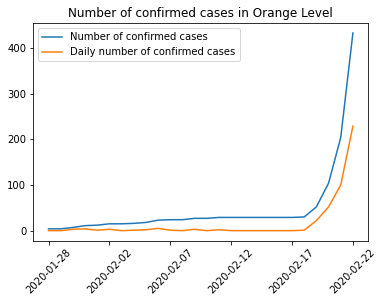

In [19]:
name = list(o_confirmed.date)
data1 = list(o_confirmed.confirmed)
data2 = list(o_confirmed.date_confirmed)
plt.plot(name, data1)
plt.plot(name, data2)
plt.legend(["Number of confirmed cases", "Daily number of confirmed cases"])
plt.title("Number of confirmed cases in Orange Level")
#plt.annotate('확진자수', xy=(2020-2-21, 433), xytext=(2020-2-15, 272),
             #arrowprops=dict(facecolor='black', shrink=0.05) )
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))


## Orange 단계의 감염자들의 특성을 파악

In [20]:
attr = orange.infection_case.value_counts()
attr

contact with patient             43
Shincheonji Church               37
etc                              33
Cheongdo Daenam Hospital         16
overseas inflow                  11
Onchun Church                     8
Seongdong-gu APT                  2
Eunpyeong St. Mary's Hospital     2
Pilgrimage to Israel              1
Name: infection_case, dtype: int64

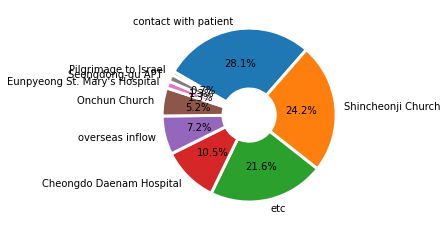

In [21]:
name = ['contact with patient', 'Shincheonji Church', 'etc', 'Cheongdo Daenam Hospital',  
'overseas inflow', 'Onchun Church', "Eunpyeong St. Mary's Hospital", 'Seongdong-gu APT', 'Pilgrimage to Israel']
data = [attr]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(data, labels=name, autopct='%.1f%%', startangle=150, counterclock=False, wedgeprops=wedgeprops)
plt.show()

## 02.23 ~ Red Level : 지역사회로의 전파

In [22]:
r_confirmed = time_confirmed[34:]
r_confirmed.head()

,date,time,confirmed,released,deceased,date_confirmed,date_deceased
34,2020-02-23,272,602,18,4,169,1
35,2020-02-24,272,833,18,8,231,4
36,2020-02-25,272,977,21,12,144,4
37,2020-02-26,272,1261,22,13,284,1
38,2020-02-27,272,1766,23,13,505,0


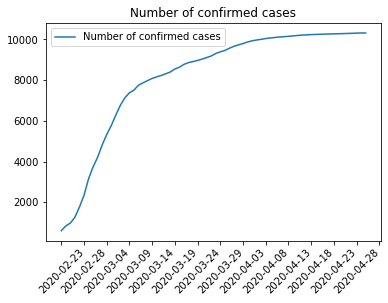

In [23]:
name = list(r_confirmed.date)
confirmed = list(r_confirmed.confirmed)
deceased = list(r_confirmed.deceased)
d_deceased = list(r_confirmed.date_deceased)
d_confirmed = list(r_confirmed.date_confirmed)

plt.plot(name, confirmed)
plt.legend(["Number of confirmed cases"])
plt.title("Number of confirmed cases")
#plt.annotate('확진자수', xy=(2020-2-21, 433), xytext=(2020-2-15, 272),
             #arrowprops=dict(facecolor='black', shrink=0.05) )
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

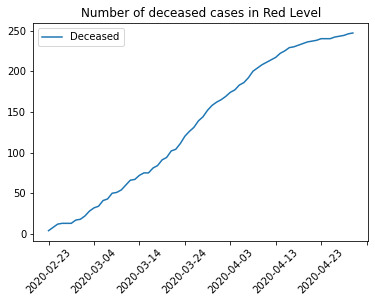

In [24]:
plt.plot(name, deceased)
plt.legend(["Deceased"])
plt.title("Number of deceased cases in Red Level")
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

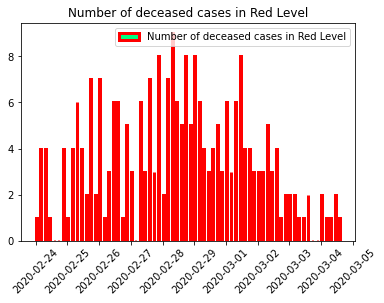

In [25]:
plt.bar(name, d_deceased, width=0.2, align='edge', color="springgreen",
        edgecolor="red", linewidth=3, tick_label=name)
plt.legend(["Number of deceased cases in Red Level"])
plt.title("Number of deceased cases in Red Level")
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

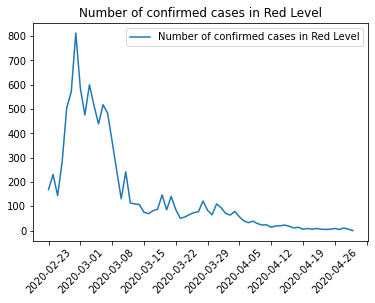

In [26]:
plt.plot(name, d_confirmed)
plt.legend(["Number of confirmed cases in Red Level"])
plt.title("Number of confirmed cases in Red Level")
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

# 사회적 거리두기

In [27]:
search = search.loc[:,['date','coronavirus']]
# 코로나가 대한민국에서 발생하기 시작한 1월 20일부터 코로나 검색빈도를 추출
search = search.loc[1480:1557, :]
search = search.reset_index(drop=True)
search.head()

,date,coronavirus
0,2020-01-20,20.69610
1,2020-01-21,35.33284
2,2020-01-22,29.74474
3,2020-01-23,100.00000
4,2020-01-24,86.11541


In [28]:
data = [0]
for i in range(1,78):
    tmp = time.loc[i]['confirmed'] - time.loc[i-1]['confirmed']
    data.append(tmp)
search['date_confiremd'] = data

In [29]:
search = search.loc[29:77,:]
search.head()

,date,coronavirus,date_confiremd
29,2020-02-18,14.97945,1
30,2020-02-19,40.75986,20
31,2020-02-20,59.21885,53
32,2020-02-21,72.15665,100
33,2020-02-22,85.23907,229


In [30]:
search["daily_confirmed"]=0
search.loc[search["date"]=='2020-03-22',"daily_confirmed"]=1000

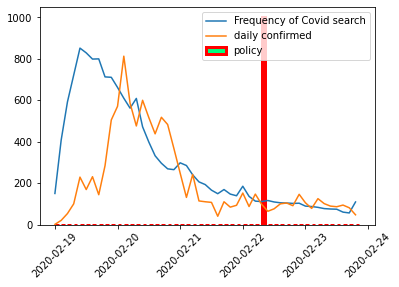

In [31]:
# 포털의 코로나바이러스 검색빈도의 최대치를 1000으로 뒀을때 매일 코로나확진자수와 검색빈도 비교

date = list(search.date)
v1 = list(round(search.coronavirus*10))
v2 = list(search.date_confiremd)
v3=list(search.daily_confirmed)

plt.plot(date, v1)
plt.plot(date, v2)
plt.bar(date, v3, width=0.6, align='edge', color="springgreen", edgecolor="red", linewidth=3, tick_label=date)
plt.legend(["Frequency of Covid search", "daily confirmed", "policy"])
#plt.annotate('852', xy=(2020-2-22, 852), xytext=(2020-2-18, 800), arrowprops=dict(facecolor='black', shrink=0.1), )
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

*****************************

# 개학 연기

In [15]:
PatientInfo = pd.read_csv('D:/LikeLion/Data/Week4/Project/PatientInfo.csv')
Policy = pd.read_csv('D:/LikeLion/Data/Week4/Project/Policy.csv')
SearchTrend = pd.read_csv('D:/LikeLion/Data/Week4/Project/SearchTrend.csv')

In [16]:
PatientInfo.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [17]:
PatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
patient_id            3388 non-null int64
global_num            2276 non-null float64
sex                   3311 non-null object
birth_year            2927 non-null float64
age                   3304 non-null object
country               3388 non-null object
province              3388 non-null object
city                  3309 non-null object
disease               18 non-null object
infection_case        2620 non-null object
infection_order       31 non-null float64
infected_by           822 non-null float64
contact_number        643 non-null float64
symptom_onset_date    481 non-null object
confirmed_date        3385 non-null object
released_date         1327 non-null object
deceased_date         62 non-null object
state                 3388 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 476.5+ KB


In [18]:
PatientInfo.query('age.isnull()',engine='python').head(10)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
563,1000000564,10313.0,NaN,NaN,NaN,Korea,Seoul,Jungnang-gu,NaN,etc,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,released
564,1000000565,10321.0,NaN,NaN,NaN,Korea,Seoul,Seongdong-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,isolated
565,1000000566,10329.0,NaN,NaN,NaN,Korea,Seoul,Gwanak-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,isolated
566,1000000567,10325.0,NaN,NaN,NaN,Korea,Seoul,Gangnam-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,isolated
567,1000000568,10358.0,NaN,NaN,NaN,Korea,Seoul,Nowon-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,isolated
568,1000000569,10355.0,NaN,NaN,NaN,Korea,Seoul,Gangnam-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,isolated
569,1000000570,10360.0,NaN,NaN,NaN,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-07,NaN,NaN,released
570,1000000571,10352.0,NaN,NaN,NaN,Korea,Seoul,Seongbuk-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-07,NaN,NaN,isolated
571,1000000572,10369.0,NaN,NaN,NaN,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,NaN,NaN,NaN,NaN,2020-04-07,NaN,NaN,isolated
572,1000000573,10357.0,NaN,NaN,NaN,Korea,Seoul,Seocho-gu,NaN,etc,NaN,NaN,NaN,NaN,2020-04-07,NaN,NaN,isolated


나이에 관해서는 총 84개의 결측값이 존재하는데, 이를 다른 값으로 대체하게 될 경우 원하는 결과에 혼란을 야기할 수 있으므로 제거하도록 한다.<br>
또한 나이에 확진 날짜가 결측인 3건에 관해서도 제거한다.

In [19]:
PatientInfo_no_NaN = PatientInfo.query('age.notnull() and confirmed_date.notnull()',engine='python').copy()

In [20]:
# 한국식 세는 나이로 편하게 보기 위하여 변환
PatientInfo_no_NaN['age'] = PatientInfo_no_NaN['birth_year'].apply(lambda x: 2020 - x + 1)

In [21]:
# 날짜는 비교가 가능하도록 날짜형으로 변환
PatientInfo_no_NaN['confirmed_date'] = pd.to_datetime(PatientInfo_no_NaN['confirmed_date'])
PatientInfo_no_NaN['released_date'] = pd.to_datetime(PatientInfo_no_NaN['released_date'])
PatientInfo_no_NaN['deceased_date'] = pd.to_datetime(PatientInfo_no_NaN['deceased_date'])

In [22]:
Confirm_Before = len(PatientInfo_no_NaN.query("confirmed_date < '2020-03-02'",engine='python'))
Confirm_After = len(PatientInfo_no_NaN.query("confirmed_date >= '2020-03-02'", engine='python'))

In [23]:
Before_open = PatientInfo_no_NaN.query("confirmed_date < '2020-03-02'",engine='python')
After_open = PatientInfo_no_NaN.query("confirmed_date >= '2020-03-02'", engine='python')

In [24]:
fig = px.pie(values = [Confirm_Before, Confirm_After], names= ['Before', 'After'], title='Pie Chart of Confirmed')
plotly.offline.plot(fig, filename='ConfirmedPie.html')
fig.show()

비율적으로 개강을 미룬 후의 날짜에 해당하는 데이터가 더 많은 것인지 확인

In [26]:
print(min(PatientInfo_no_NaN['confirmed_date']))
print(max(PatientInfo_no_NaN['confirmed_date']))

2020-01-20 00:00:00
2020-04-29 00:00:00


In [27]:
Student_before = len(Before_open.query('age < 20'))
Adult_before = len(Before_open.query('age >= 20'))
Student_after = len(After_open.query('age < 20'))
Adult_after = len(After_open.query('age >= 20'))

In [28]:
pie_df = pd.DataFrame.from_records([{
    'Student Before': Student_before,
    'Adult Before': Adult_before,
    'Student After': Student_after,
    'Adult After': Adult_after
}])

In [29]:
pie_df

,Adult After,Adult Before,Student After,Student Before
0,1929,851,110,34


In [30]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type":"pie"}, {"type":"pie"}]])

fig1 = go.Pie(values=[Student_before, Adult_before], labels=['Student','Adult'], name='Pie Chart of Before Open')
fig2 = go.Pie(values=[Student_after, Adult_after], labels=['Student','Adult'], name='Pie Chart of After Open')


fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=1, col=2)

plotly.offline.plot(fig, filename='SubplotPie.html')

fig.show()

시계열로 확인해볼 수 있도록 한다.<br>
우선 전체적인 추세를 본다.

In [32]:
confirmed_patient = PatientInfo_no_NaN.groupby('confirmed_date')['patient_id'].nunique()
confirmed_patient = pd.DataFrame(confirmed_patient)
confirmed_patient = confirmed_patient.reset_index()
confirmed_patient.columns=['Date','Count']

In [33]:
fig = px.line(confirmed_patient, x='Date', y='Count')
plotly.offline.plot(fig, filename='ConfirmedLine.html')
fig.show()

추세를 봤을때는 조금씩의 변화는 있지만 3월 초 후로는 감소하는 추세를 보이고 있다.

In [35]:
confirmed_student = PatientInfo_no_NaN.query('age < 20').groupby('confirmed_date')['patient_id'].nunique()
confirmed_student = pd.DataFrame(confirmed_student)
confirmed_student = confirmed_student.reset_index()
confirmed_student.columns=['Date','Count']

In [40]:
fig = px.line(confirmed_student, x='Date', y='Count')
fig.add_vline(x='2020-03-02', line_dash="dash", line_color="red")
plotly.offline.plot(fig, filename='StudentLine.html')
fig.show()

## 결론

확진된 학생의 수를 본다면, 이는 3월2일 이전에 피크를 찍은 구간을 제외하고는 변동은 있지만 꾸준히 계속 있어왔고 오히려 전체적인 확진자의 수는 줄어가는 반면 확진된 학생의 수는 증가하였기 때문에 이는 정책의 효과가 미미하였다고 볼 수 있다. <br>
이러한 결과를 초래한 것은 오히려 개학이 미루어짐으로써 학생들이 개학이 미루어짐으로써 자택에 있는게 아닌 오히려 외부 활동을 독려하는 계기가 된 것으로 판단된다.

****************************

# 마스크 5부제

In [2]:
patient = pd.read_csv("D:/LikeLion/Data/Week4/Project/PatientInfo.csv")
policy = pd.read_csv("D:/LikeLion/Data/Week4/Project/Policy.csv")

In [3]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   sex                 3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

In [4]:
patient.query('confirmed_date.isnull()',engine='python').head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2980,6011000051,NaN,female,1980.0,40s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated
2981,6011000052,NaN,female,2011.0,0s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated
2982,6011000053,NaN,female,2001.0,10s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,2020-04-15,NaN,NaN,NaN,isolated


총 3건의 결측값이 존재한다. 날짜가 존재하지 않을시 정책에 따른 확진자수 증감 여부를 판단하는게 불가능하므로 이 데이터들은 삭제한다.

In [5]:
patient_clean = patient.query('confirmed_date.notnull()',engine='python').copy()

## 마스크5부제 시행일자 : 3월9일
3월 9일을 기준으로 그 전 2주 그 후 3주간의 기간의 확진자 증감추이를 확인한다. - 잠복기 2주를 생각하여 기준으로 정하였음

In [6]:
patient_clean['confirmed_date'] = pd.to_datetime(patient_clean['confirmed_date'])

In [34]:
before_mask= patient_clean.query("'2020-02-23' < confirmed_date < '2020-03-09'",engine='python')
after_mask = patient_clean.query("'2020-03-09' < confirmed_date < '2020-03-30'",engine='python')

In [35]:
confirmed_patient = patient_clean.groupby('confirmed_date')['patient_id'].nunique()
confirmed_patient_before = before_mask.groupby('confirmed_date')['patient_id'].nunique()
confirmed_patient_after = after_mask.groupby('confirmed_date')['patient_id'].nunique()

In [36]:
#마스크 2주 전 확진자 추이
#confirmed_patient_before.plot(figsize=(15,5))
#plt.title("Confirmed Patients")
#plt.xlabel('Confirmed Date')
#plt.xticks(rotation=45)
#plt.show()

In [37]:
confirmed_patient_before = before_mask.groupby('confirmed_date')['patient_id'].nunique()
confirmed_patient_before = pd.DataFrame(confirmed_patient_before)
confirmed_patient_before = confirmed_patient_before.reset_index()
confirmed_patient_before.columns=['Date','Count']

fig = px.line(confirmed_patient_before, x='Date', y='Count')
fig

In [38]:
#마스크 2주 후 확진자 추이
#confirmed_patient_after.plot(figsize=(15,5))
#plt.title("Confirmed Patients")
#plt.xlabel('Confirmed Date')
#plt.xticks(rotation=45)
#plt.show()

In [39]:
confirmed_patient_after = after_mask.groupby('confirmed_date')['patient_id'].nunique()
confirmed_patient_after = pd.DataFrame(confirmed_patient_after)
confirmed_patient_after = confirmed_patient_after.reset_index()
confirmed_patient_after.columns=['Date','Count']

fig = px.line(confirmed_patient_after, x='Date', y='Count')
fig

In [48]:
confirmed_patient = patient_clean.groupby('confirmed_date')['patient_id'].nunique()
confirmed_patient = pd.DataFrame(confirmed_patient)
confirmed_patient = confirmed_patient.reset_index()
confirmed_patient.columns=['Date','Count']

fig = px.line(confirmed_patient, x='Date', y='Count')
fig.add_vline(x='2020-03-09', line_dash="dash", line_color="red")

확진자가 마스크 5부제 시행전에는 특별한 규칙 없이 나타났다면 5부제 시행이후 약간의 증가폭이 있지만 확연한 감소세를 보여주고 있다.

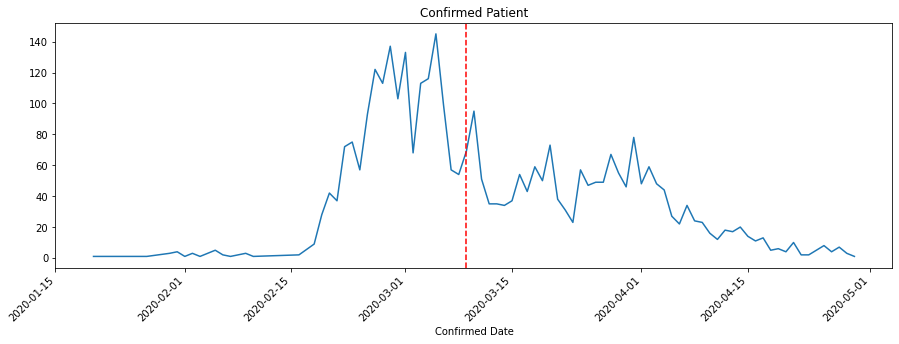

In [11]:
#전체적인 환자 추이
#confirmed_patient.plot(figsize=(15,5))
#plt.title("Confirmed Patient")
#plt.xlabel('Confirmed Date')
#plt.xticks(rotation=45)
#plt.axvline(x=pd.to_datetime('2020-03-09'), color='red', linestyle='--')
#plt.show()

전체적인 그래프를 보니 확실히 3월 9일 마스크 5부제 시행후로 확진자수가 감소세에 들어감을 알 수 있었다. 이로 인해 우리는 마스크 5부제라는 정책이 초반 코로나 종식에 있어 크나큰 역활을 했음을 알 수 있었다.

## 마스크 전파 억제 효과
우리는 마스크 5부제로 인해 코로나 전파 억제 효과를 알 수 있었다. 하지만 이 마스크가 관연 실질적인 전파억제에 영향을 끼쳤는지 궁금해졌다.
가정 : 마스크를 잘 썻다면 전파가 되지 않았다

In [46]:
#해외전파자
contact_patient = patient_clean.query("'contact with patient' == infection_case", engine= 'python')
contact_patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,43.0,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,11.0,male,1995.0,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,0.0,NaN,2020-01-31,2020-02-10,NaN,released
9,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,3.0,1.000000e+09,6.0,NaN,2020-02-05,2020-02-29,NaN,released


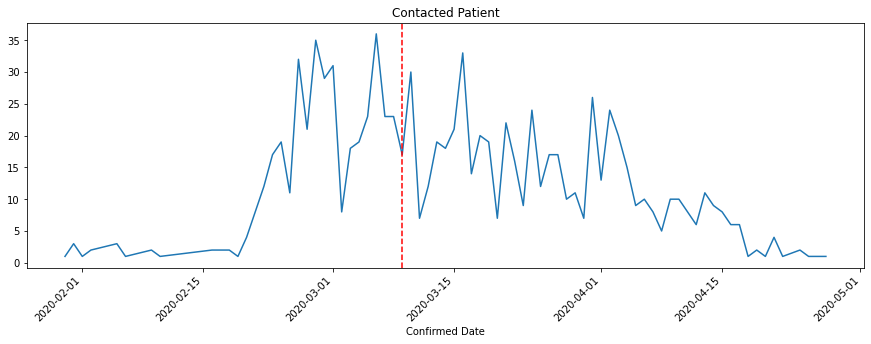

In [42]:
#밀접접촉환자 추이
contact_patient= contact_patient.groupby("confirmed_date")['patient_id'].nunique()
contact_patient.plot(figsize=(15,5))
plt.title("Contacted Patient")
plt.xlabel('Confirmed Date')
plt.xticks(rotation=45)
plt.axvline(x=pd.to_datetime('2020-03-09'), color='red', linestyle='--')
plt.show()

In [47]:
contact_patient= contact_patient.groupby("confirmed_date")['patient_id'].nunique()
contact_patient = pd.DataFrame(contact_patient)
contact_patient = contact_patient.reset_index()
contact_patient.columns=['Date','Count']

fig = px.line(contact_patient, x='Date', y='Count')
fig.add_vline(x='2020-03-09', line_dash="dash", line_color="red")

마스크 5부제 시행이후로 뚜렷한 감소세가 없으므로 우리는 마스크로 인해 밀접접촉환자가 줄어들었다고는 설명할 수 없었다.

In [15]:
patient_clean.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


*********************

# 특별 이민 절차

In [2]:
PatientInfo = pd.read_csv('D:/LikeLion/Data/Week4/Project/PatientInfo.csv',parse_dates=["confirmed_date"])
region = pd.read_csv('D:/LikeLion/Data/Week4/Project/Region.csv')
PatientInfo.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [3]:
region = pd.DataFrame(region)

In [4]:
Output = pd.merge(region, PatientInfo, on=['city','province'])
Output.describe()

,code,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,patient_id,global_num,birth_year,infection_order,infected_by,contact_number
count,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3.253000e+03,2154.000000,2828.000000,29.000000,7.990000e+02,602.000000
mean,35915.533354,36.628161,127.847826,38.721180,64.296034,3.854903,1.478730,16.945460,7.781709,744.420842,3.584541e+09,6844.575209,1975.302334,2.482759,2.704066e+09,14.481728
std,21892.690317,0.852660,0.887869,23.596678,43.574031,3.511951,0.606305,6.737559,4.543833,610.450246,2.194277e+09,3242.588062,20.222345,1.454566,1.747496e+09,53.703077
min,10010.000000,33.488936,126.297950,4.000000,5.000000,0.000000,0.250000,7.690000,3.300000,24.000000,1.000000e+09,2.000000,1916.000000,1.000000,1.000000e+09,0.000000
25%,14080.000000,35.825056,127.032693,22.000000,33.000000,1.000000,1.170000,13.100000,5.200000,427.000000,1.400000e+09,4771.500000,1961.000000,1.000000,1.350000e+09,2.000000
50%,20310.000000,36.789844,127.487396,31.000000,61.000000,3.000000,1.350000,16.180000,6.700000,530.000000,2.000001e+09,7996.500000,1975.000000,2.000000,2.000000e+09,4.000000
75%,60010.000000,37.483804,128.741544,48.000000,78.000000,6.000000,1.760000,16.950000,7.700000,955.000000,6.001001e+09,9514.750000,1994.000000,3.000000,4.100000e+09,11.000000
max,70000.000000,38.207022,129.416575,113.000000,195.000000,10.000000,4.180000,40.260000,24.700000,3088.000000,7.000000e+09,10758.000000,2020.000000,6.000000,7.000000e+09,1091.000000


In [5]:
subset = pd.DataFrame(Output[['province','city', 'latitude', 'longitude','infection_case']])
subset.head()

,province,city,latitude,longitude,infection_case
0,Seoul,Gangnam-gu,37.518421,127.047222,Shincheonji Church
1,Seoul,Gangnam-gu,37.518421,127.047222,etc
2,Seoul,Gangnam-gu,37.518421,127.047222,contact with patient
3,Seoul,Gangnam-gu,37.518421,127.047222,contact with patient
4,Seoul,Gangnam-gu,37.518421,127.047222,etc


In [6]:
RgnCnt = Output[['latitude','longitude']].dropna() 
RgnCnt.head()

,latitude,longitude
0,37.518421,127.047222
1,37.518421,127.047222
2,37.518421,127.047222
3,37.518421,127.047222
4,37.518421,127.047222


토탈 확진자 지도로 표시

In [7]:
ma = folium.Map([36.4, 128], zoom_start=7)
plugins.MousePosition().add_to(ma) 
plugins.MarkerCluster(RgnCnt).add_to(ma)
ma

감염경로 중 해외 유입이 604건으로 이에대해 조사해본다.

Text(0, 0.5, 'infection_case')

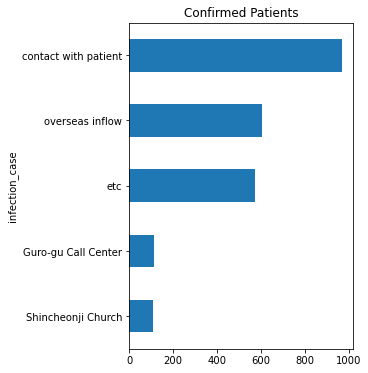

In [8]:
ContactCnt=PatientInfo["infection_case"].value_counts()
ContactCntTop=ContactCnt.sort_values().tail(5)
ContactCntTop.plot.barh(figsize=(4,6))
plt.title("Confirmed Patients")
plt.ylabel('infection_case')

In [9]:
PatientInfo["OverSea"] = PatientInfo["infection_case"]
PatientInfo["OverSea"] = PatientInfo["OverSea"].str.strip()
PatientInfo.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,OverSea
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,overseas inflow
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,overseas inflow
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,contact with patient
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,overseas inflow
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,contact with patient


In [10]:
PatientInfo["Month"]=PatientInfo["confirmed_date"].dt.month

Text(0.5, 1.0, 'Number of confirmed overseas inflows')

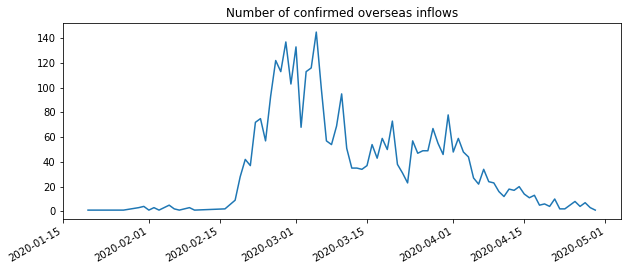

In [11]:
Overseas = PatientInfo[(PatientInfo["infection_case"]=='overseas inflow')].copy()
PatientInfo["confirmed_date"].value_counts().sort_index().plot(figsize=(10,4))
plt.title("Number of confirmed overseas inflows")

In [12]:
OverseasCntRgn = Overseas["province"].value_counts()
OverseasCntRgn.head()

Seoul               257
Gyeonggi-do         157
Incheon              38
Busan                29
Gyeongsangbuk-do     15
Name: province, dtype: int64

In [13]:
TotalCntRgn = PatientInfo["province"].value_counts()

In [14]:
df_Total_Rgn = TotalCntRgn.to_frame()
df_Total_Rgn.columns = ["Total patients"]
df_Total_Rgn.head(20)

,Total patients
Gyeongsangbuk-do,1230
Gyeonggi-do,677
Seoul,633
Chungcheongnam-do,143
Busan,134
Gyeongsangnam-do,116
Incheon,92
Daegu,63
Gangwon-do,51
Sejong,46


In [15]:
Overseas_Rgn = pd.DataFrame({"overseas inflow patients" : OverseasCntRgn})
Overseas_Rgn.head()

,overseas inflow patients
Seoul,257
Gyeonggi-do,157
Incheon,38
Busan,29
Gyeongsangbuk-do,15


In [16]:
dfTotal_Overseas_case = df_Total_Rgn.merge(Overseas_Rgn, left_index=True, right_index=True)
dfTotal_Overseas_case.head(20)

,Total patients,overseas inflow patients
Gyeongsangbuk-do,1230,15
Gyeonggi-do,677,157
Seoul,633,257
Chungcheongnam-do,143,13
Busan,134,29
Gyeongsangnam-do,116,15
Incheon,92,38
Gangwon-do,51,13
Sejong,46,3
Chungcheongbuk-do,45,5


Text(0.5, 1.0, 'Confirmed Patients')

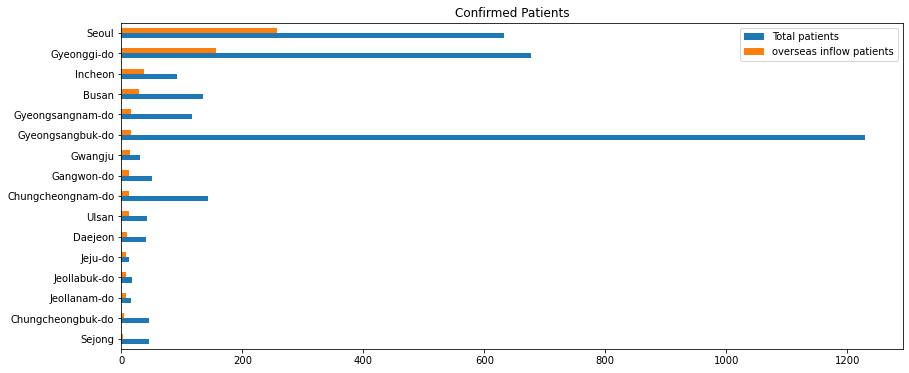

In [17]:
dfTotal_Overseas_case.sort_values(by="overseas inflow patients").plot.barh(figsize=(14, 6))
plt.title("Confirmed Patients")

In [3]:
df_seoul = pd.read_csv('D:/LikeLion/Data/Week4/Project/seoul.csv',engine='python')

In [19]:
df_seoul

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,634,2020-04-30,NaN,NaN,NaN,서대문구,인도네시아,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y
1,633,2020-04-27,NaN,NaN,NaN,강남구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y
2,632,2020-04-27,NaN,NaN,NaN,관악구,필리핀,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y
3,631,2020-04-27,NaN,NaN,NaN,강남구,러시아,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y
4,630,2020-04-27,NaN,NaN,NaN,성북구,미국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y
630,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y
631,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y
632,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y


In [20]:
df_seoul["해외2"] = df_seoul["여행력"]
df_seoul["해외2"] = df_seoul["해외2"].str.strip()
df_seoul["해외2"] = df_seoul["해외2"].replace("-", np.nan)
df_seoul["해외2"].nunique()


40

In [21]:

DF_Oversea2 = df_seoul[df_seoul["해외2"].notnull()].copy()
DF_Oversea2.shape

(252, 15)

In [22]:
DF_Oversea2["해외2"].unique()

array(['인도네시아', '영국', '필리핀', '러시아', '미국', '일본', '아일랜드', '프랑스', '아프리카',
       '캐나다', '독일', '멕시코', '프랑스 스페인 이탈리아 독일 네덜란드', '터키', '오세아니아',
       '호주 인도네시아', '스페인', '이탈리아', '포르투갈', '브라질', '유럽', '미국 캐나다 멕시코',
       '오스트리아', '미국 브라질', '태국', '멕시코 미국', '아시아', '아르헨티나 볼리비아 브라질',
       '말레이시아 인도네시아', '브라질아르헨티아칠레볼리비아', '프랑스 독일', '스페인 카타르', '이탈리아 프랑스',
       '체코 헝가리 오스트리아 이탈리아 프랑스', '오스트리아 모로코 프랑스', '폴란드', '독일 프랑스', '중국',
       '베트남', '싱가폴'], dtype=object)

In [23]:
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(", ", "|")
DF_Oversea2[DF_Oversea2["해외2"].str.contains(europe)].head(6)

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,해외2
1,633,2020-04-27,NaN,NaN,NaN,강남구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,영국
17,617,2020-04-14,NaN,NaN,NaN,서초구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,영국
19,615,2020-04-14,NaN,NaN,NaN,동작구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,영국
20,614,2020-04-14,NaN,NaN,NaN,성동구,아일랜드,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,아일랜드
42,592,2020-04-08,NaN,NaN,NaN,강남구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,영국
44,590,2020-04-08,NaN,NaN,NaN,영등포구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,영국


In [24]:
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(", ", "|")
DF_Oversea2[DF_Oversea2["해외2"].str.contains(europe)].head(6)

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,해외2
1,633,2020-04-27,NaN,NaN,NaN,강남구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,영국
17,617,2020-04-14,NaN,NaN,NaN,서초구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,영국
19,615,2020-04-14,NaN,NaN,NaN,동작구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,영국
20,614,2020-04-14,NaN,NaN,NaN,성동구,아일랜드,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,아일랜드
42,592,2020-04-08,NaN,NaN,NaN,강남구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,영국
44,590,2020-04-08,NaN,NaN,NaN,영등포구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,영국


In [25]:
DF_Oversea2

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,해외2
0,634,2020-04-30,NaN,NaN,NaN,서대문구,인도네시아,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,인도네시아
1,633,2020-04-27,NaN,NaN,NaN,강남구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,영국
2,632,2020-04-27,NaN,NaN,NaN,관악구,필리핀,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,필리핀
3,631,2020-04-27,NaN,NaN,NaN,강남구,러시아,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,러시아
4,630,2020-04-27,NaN,NaN,NaN,성북구,미국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,미국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,9,2020-02-05,NaN,NaN,NaN,송파구,싱가폴,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,싱가폴
626,8,2020-02-02,NaN,NaN,NaN,타시도,중국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,중국
630,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,중국
632,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,중국


In [26]:
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

In [27]:
DF_Oversea2.loc[DF_Oversea2["해외2"].str.contains(europe), "해외2"] = "유럽"
DF_Oversea2.loc[DF_Oversea2["해외2"].str.contains(south_america), "해외2"] = "남미"
DF_Oversea2.loc[DF_Oversea2["해외2"].str.contains("중국|우한"), "해외2"] = "중국"
DF_Oversea2.loc[DF_Oversea2["해외2"].str.contains("아랍에미리트|필리핀"), "해외2"] = "아시아"
DF_Oversea2.loc[DF_Oversea2["해외2"].str.contains("미국"), "해외2"] = "미국"
DF_Oversea2["해외2"].value_counts()

미국             109
유럽              85
아시아             18
남미              10
중국               7
태국               6
캐나다              4
오세아니아            2
인도네시아            2
일본               2
러시아              1
베트남              1
아프리카             1
말레이시아 인도네시아      1
호주 인도네시아         1
포르투갈             1
싱가폴              1
Name: 해외2, dtype: int64

In [28]:
DF_Oversea2["해외2"].describe()

count     252
unique     17
top        미국
freq      109
Name: 해외2, dtype: object

In [29]:
DF_Oversea2

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,해외2
0,634,2020-04-30,NaN,NaN,NaN,서대문구,인도네시아,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,인도네시아
1,633,2020-04-27,NaN,NaN,NaN,강남구,영국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,유럽
2,632,2020-04-27,NaN,NaN,NaN,관악구,필리핀,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,아시아
3,631,2020-04-27,NaN,NaN,NaN,강남구,러시아,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,러시아
4,630,2020-04-27,NaN,NaN,NaN,성북구,미국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,미국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,9,2020-02-05,NaN,NaN,NaN,송파구,싱가폴,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,싱가폴
626,8,2020-02-02,NaN,NaN,NaN,타시도,중국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,중국
630,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,중국
632,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-03-24 10:53,2021-03-24 13:05,Y,중국


In [30]:
Day_oversea2 = DF_Oversea2.groupby(["확진일", "해외2"])["노출여부"].count()
Day_oversea2.head()

확진일         해외2
2020-01-24  중국     1
2020-01-30  중국     2
2020-02-02  중국     1
2020-02-05  싱가폴    1
2020-02-06  중국     2
Name: 노출여부, dtype: int64

In [31]:
Day_oversea2 = Day_oversea2.groupby(level=[1]).cumsum()
Day_oversea2

확진일         해외2  
2020-01-24  중국         1
2020-01-30  중국         3
2020-02-02  중국         4
2020-02-05  싱가폴        1
2020-02-06  중국         6
                    ... 
2020-04-27  러시아        1
            미국       109
            아시아       18
            유럽        85
2020-04-30  인도네시아      2
Name: 노출여부, Length: 111, dtype: int64

In [32]:
DF_Day_Oversea2 = Day_oversea2.reset_index()
DF_Day_Oversea2 = DF_Day_Oversea2.rename(columns={"연번":"누적확진수"})
DF_Day_Oversea2.head()

,확진일,해외2,노출여부
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가폴,1
4,2020-02-06,중국,6


In [33]:
Oversea_Cnt = DF_Oversea2["해외2"].value_counts()
Oversea_Cnt.head(10)

미국       109
유럽        85
아시아       18
남미        10
중국         7
태국         6
캐나다        4
오세아니아      2
인도네시아      2
일본         2
Name: 해외2, dtype: int64

In [34]:
DF_Day_Oversea2 = DF_Day_Oversea2.set_index("확진일")

<AxesSubplot:xlabel='확진일'>

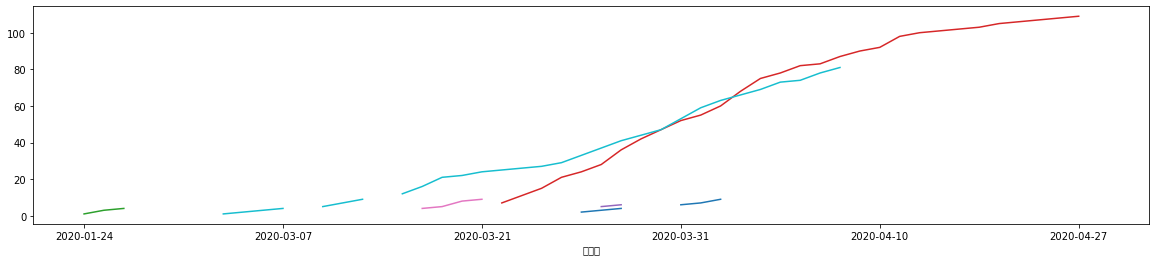

In [35]:
DF_Day_Oversea2.pivot(columns="해외2").plot(figsize=(20, 4), legend=False)

결론 : 3월부터 시작된 특별 입국 절차로 인해서 증가된 그래프가 보였으나 4/1일 기점으로 해외 유입이 줄어들었으며 서울에서 제일 많이 발생되었다.